[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

# [RQ3] Do the all trips last the same? 

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import pylab as pyl

from time import time

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))
borough_lst.pop()

'Unknown'

In [44]:
df = functions.make_duration_df(df_names,taxi_zone_lookup)

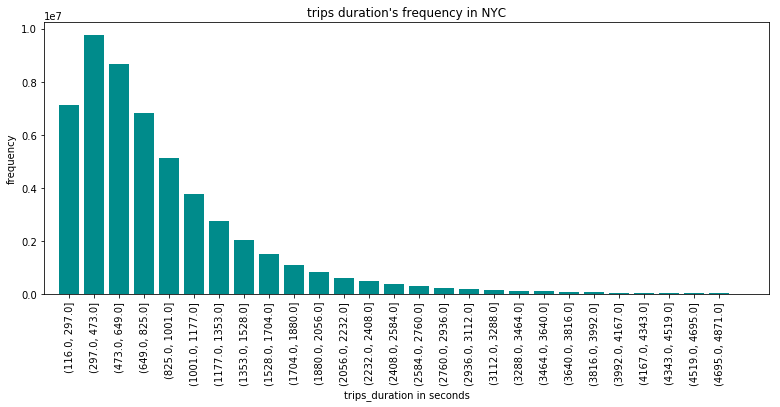

In [58]:
functions.plot_frequencies(df['durations'], 'NYC')

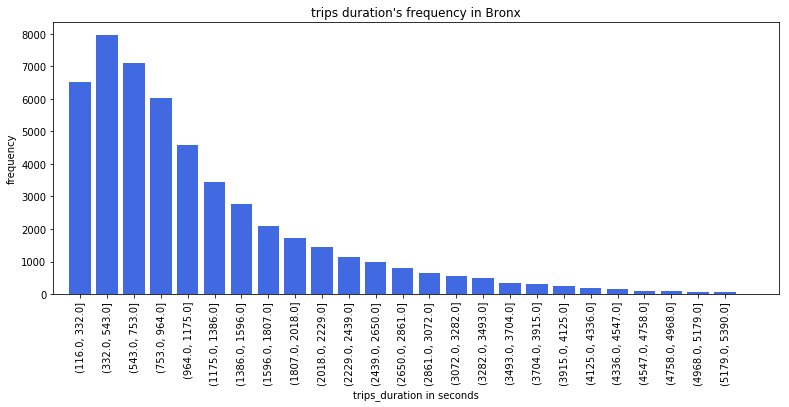

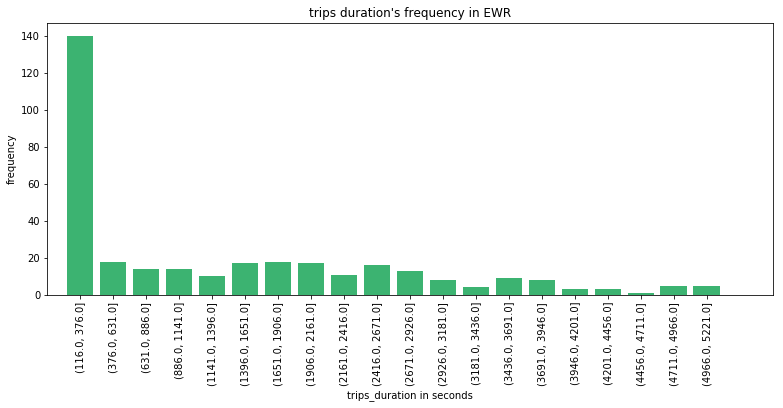

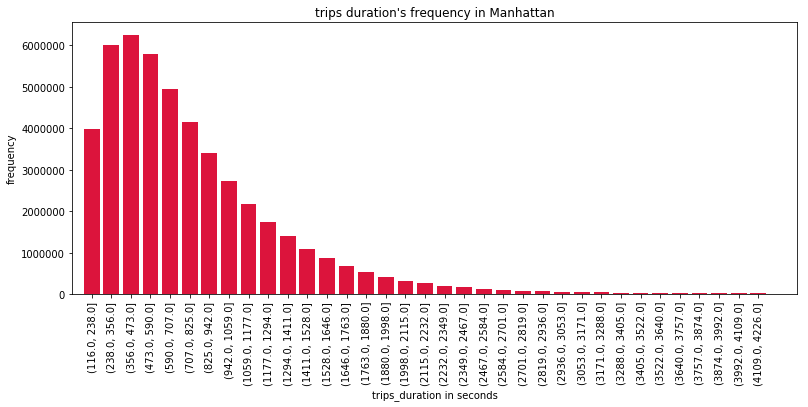

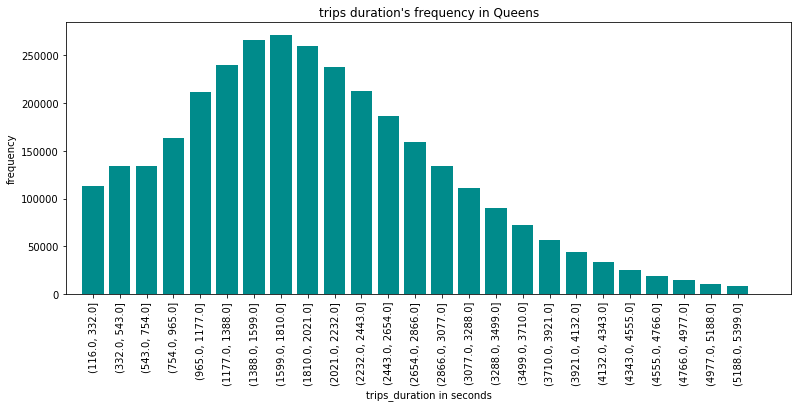

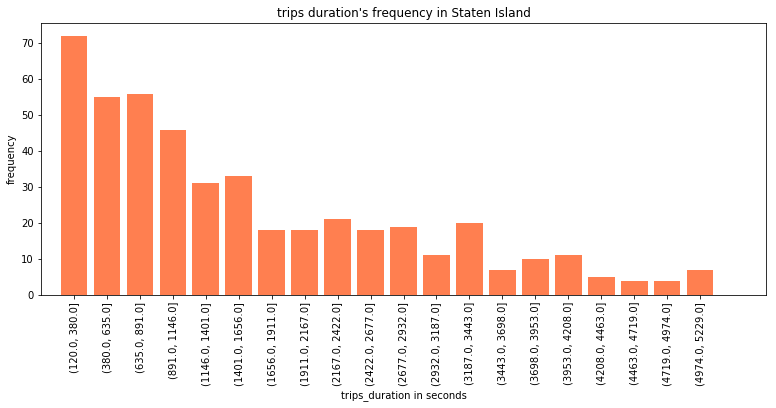

In [67]:
functions.Boroughs_durations_freq(df, borough_lst)
